# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_test)+1

print("Number of training examples =", n_train)
print("Number of training examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of training examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

# Normalization and grayscale flags:

gray = True
normalize = True

if (gray):
    dim = 1 # dimension required by the nn
    X_train_tmp = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    X_valid_tmp = np.zeros((X_valid.shape[0], X_valid.shape[1], X_valid.shape[2]))
    X_test_tmp = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

    # Converting the images to grayscale
    for i in range(X_train.shape[0]):
        X_train_tmp[i,:,:] = np.average(X_train[i,:,:,:], weights=[0.299, 0.587, 0.114], axis=2)
    for i in range(X_valid.shape[0]):
        X_valid_tmp[i,:,:] = np.average(X_valid[i,:,:,:], weights=[0.299, 0.587, 0.114], axis=2)
    for i in range(X_test.shape[0]):
        X_test_tmp[i,:,:] = np.average(X_test[i,:,:,:], weights=[0.299, 0.587, 0.114], axis=2)

    X_train = X_train_tmp
    X_valid = X_valid_tmp
    X_test = X_test_tmp

    X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], X_train.shape[2], 1])
    X_valid = np.reshape(X_valid, [X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1])
    X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], X_test.shape[2], 1])

    print(X_train.shape)
    print(X_valid.shape)
    print(X_test.shape)
else:
    dim = 3
        

plt.figure()
spread = np.zeros((n_classes))

'''# Distribution of classes in the dataset
for i in range(n_classes):
    spread[i] = np.sum(y_train==i)
'''
num_bins = n_classes

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(y_train, num_bins)
# add a 'best fit' line
#ax.plot(bins, '--')
ax.set_xlabel('Class')
ax.set_ylabel('n')
ax.set_title(r'Distribution of training data')

plt.show()


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


36
(32, 32, 1)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


C:\Users\khalid18\AppData\Local\conda\conda\envs\carnd-term1-gpu\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


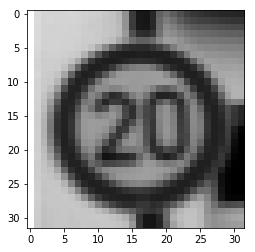

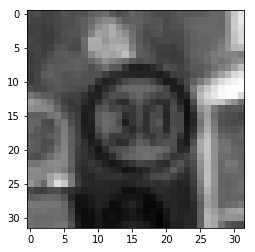

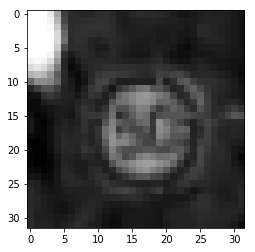

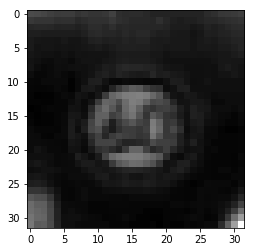

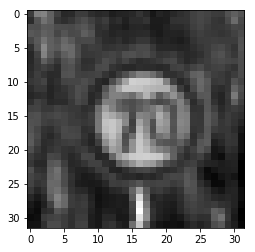

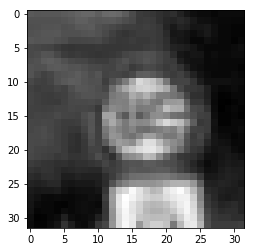

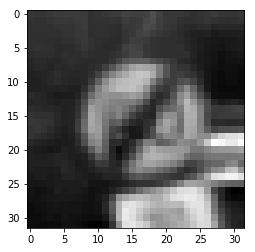

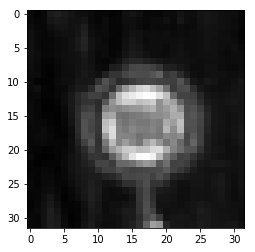

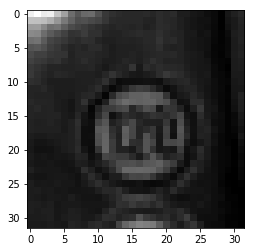

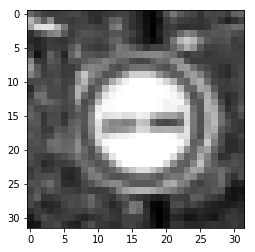

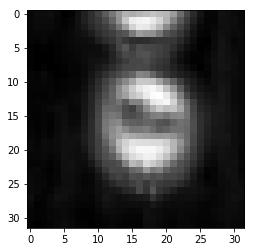

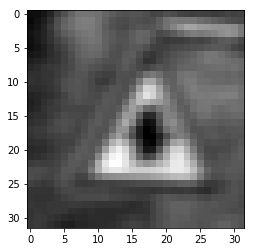

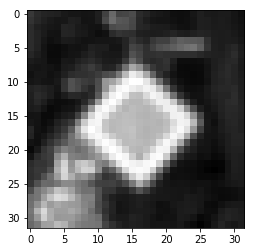

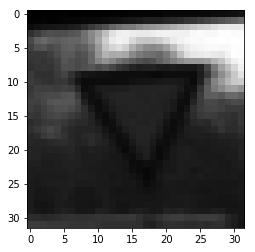

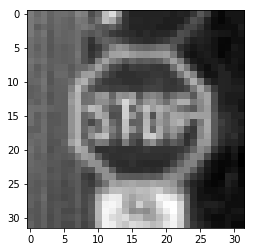

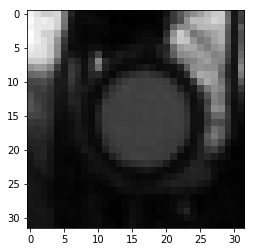

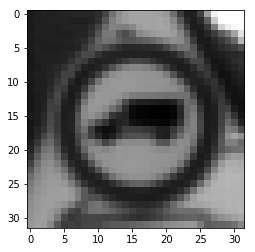

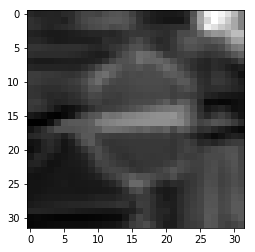

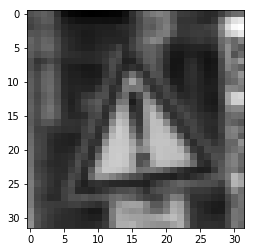

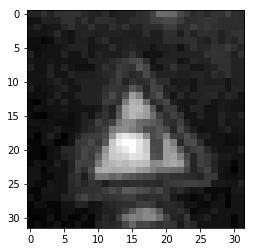

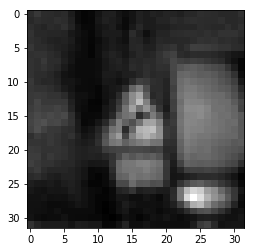

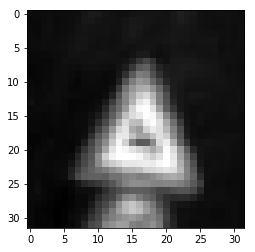

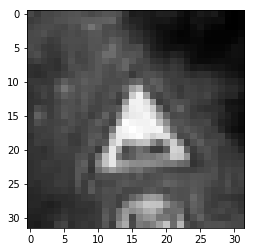

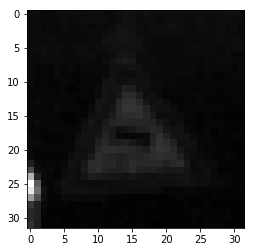

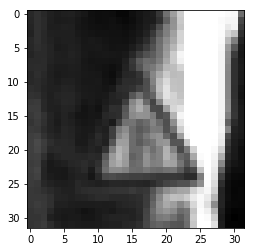

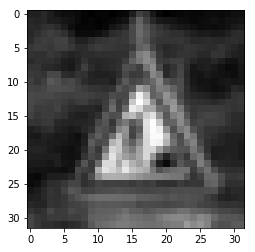

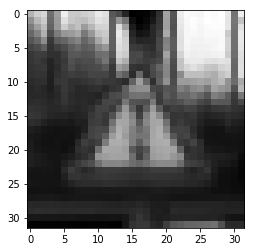

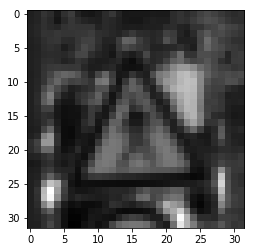

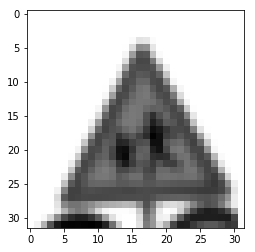

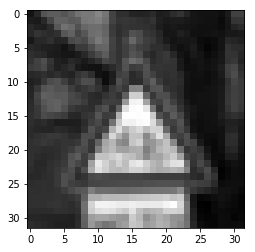

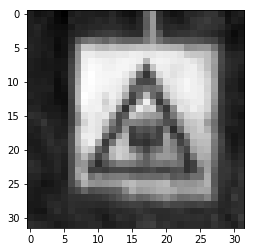

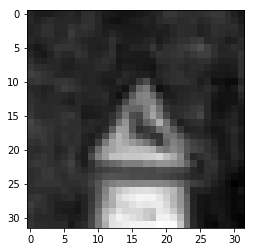

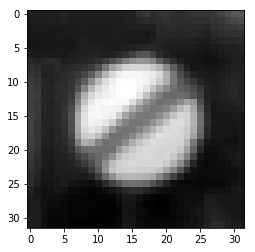

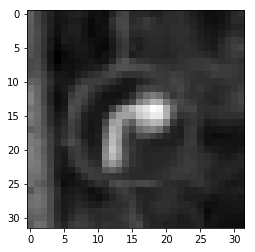

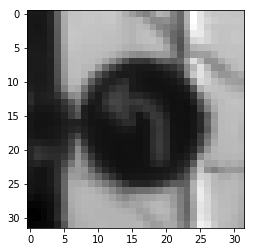

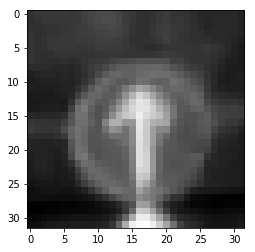

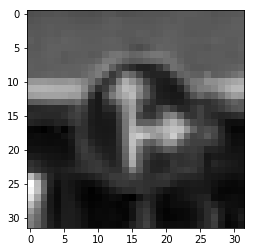

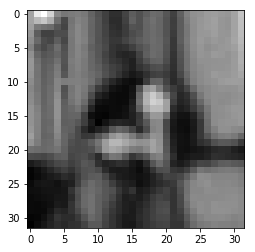

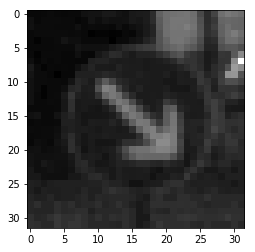

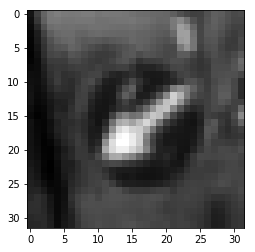

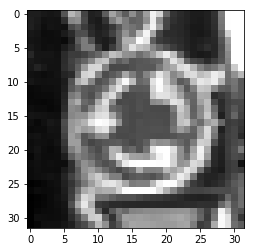

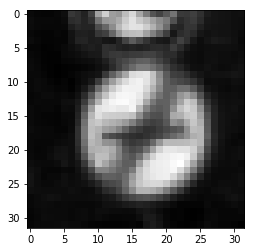

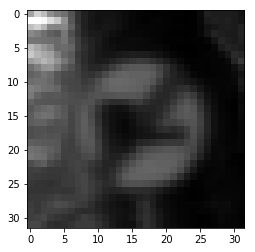

In [4]:
# Visualization of each type of road sign running through the classifier
%matplotlib inline
print(y_train[1000])
print(X_train[1000,:,:,:].shape)

for i in range(n_classes):
    exp = np.argmax(y_train==i)
    print(i)
    plt.figure()
    plt.imshow(np.squeeze(X_train[exp,:,:,:]), cmap="gray")


In [5]:
# Creating new training data based on the information in signnames.csv
%matplotlib inline
print(y_train[1000])
print(X_train[1000,:,:,:].shape)
# Indicate the images that will be switched 
flipper = np.array([[9,11,12,13,15,16,17,18,19,20,22,26,29,30,33,34,36,37,38,39,40],[9,11,12,13,15,16,17,18,20,19,22,26,29,30,34,33,37,36,39,38,40]])
X_train_new = list()
y_train_new = list()
'''testing = 0'''
for i in range(flipper[0].shape[0]):
    for j,k in enumerate(y_train==flipper[0][i]):
        if (k==True):
            old_image = np.squeeze(X_train[j,:,:,:])
            new_image = np.flip(np.squeeze(X_train[j,:,:,:]),1)
            X_train_new.append(new_image)
            y_train_new.append(flipper[1][i])
'''            print('Current image is:' + str(flipper[1][i]))
            plt.figure()
            plt.imshow(old_image, cmap="gray")
            plt.figure()
            plt.imshow(new_image, cmap="gray")
            testing+=1
            if (testing==3):
                break;'''
X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)
X_train_new = np.reshape(X_train_new,[X_train_new.shape[0], X_train_new.shape[1], X_train_new.shape[2], dim])
print('Shape of new X_train matrix is: {}'.format(X_train_new.shape))
print('Shape of new y_train array is: {}'.format(y_train_new.shape))
print('Shape of old X_train matrix is: {}'.format(X_train.shape))
print('Shape of old y_train array is: {}'.format(y_train.shape))

X_train_combined = np.concatenate((X_train,X_train_new))
y_train_combined = np.concatenate((y_train,y_train_new))

print('Shape of combined X_train matrix is: {}'.format(X_train_combined.shape))
print('Shape of combined y_train array is: {}'.format(y_train_combined.shape))

X_train_old = X_train
y_train_old = y_train
X_train = X_train_combined
y_train = y_train_combined

36
(32, 32, 1)
Shape of new X_train matrix is: (15149, 32, 32, 1)
Shape of new y_train array is: (15149,)
Shape of old X_train matrix is: (34799, 32, 32, 1)
Shape of old y_train array is: (34799,)
Shape of combined X_train matrix is: (49948, 32, 32, 1)
Shape of combined y_train array is: (49948,)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np

# Define normalizer function
def normalizer(val):
    val = (val-128/255)
    return val 

if (normalize):
    X_train = normalizer(X_train)
    X_valid = normalizer(X_valid)
    X_test = normalizer(X_test)


# Shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train) 
print(X_train.shape)
print(y_train.shape)


(49948, 32, 32, 1)
(49948,)


### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Setting up tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

epochs = 500
batch_size = 128

def Net(x):
    #Hyperparameters
    mu = 0 #mean
    sigma = 0.05 #standard deviation
    
    #~~~Layer 1 - Set up first convolutional layer
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,dim,6), mean=mu, stddev=sigma)) #declare filter dimensions
    conv1_b = tf.Variable(tf.zeros(6)) #define the bias
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b #add the bias to the result of the convolution

    # Activation - Run the resulting values through an activation function
    conv1 = tf.nn.relu(conv1)
    
    # Add a pooling layer
    conv1 = tf.nn.max_pool(conv1, ksize=(1,2,2,1), strides=[1,2,2,1], padding='VALID') #Use a 2x2 kernel with a stride of 2
    
    #~~~Layer2 - Set up the second convolutional layer
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # Activation - Run the resulting values through an activation function again
    conv2 = tf.nn.relu(conv2)
    
    # Add another pooling layer
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten data before sending to a fully connected layer
    fc0 = flatten(conv2)
    
    #~~~Layer 3 - Fully Connected
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation
    fc1 = tf.nn.relu(fc1)
    
    #~~~Layer 4 - Fully Connected once again!
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # ...Another Fully Connected Layer
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2,fc3_W) + fc3_b
    
    return logits  

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation

In [8]:
# Create placeholders for the data (None refers to the batch size which has not been determined yet!)
x = tf.placeholder(tf.float32, (None,32,32,dim))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,43)

### Train your model here.
rate = 0.001

logits = Net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y) # Quantify the extent to which our calculated logits correspond to the actual one hot encoded labels
loss_operation = tf.reduce_mean(cross_entropy) # Calculate the average cross-entropy
optimizer = tf.train.AdamOptimizer(learning_rate=rate) # Adam Optimizer used for function optimization
training_operation = optimizer.minimize(loss_operation) # Use the optimizer to minimize the loss function 


In [ ]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) # logits and one_hot_y are both nx10 matrices and the resulting matrix is nx1
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Evaluation function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy/num_examples

In [ ]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Initialize the globl variables
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            batch_X, batch_y = X_train[offset:offset+batch_size], y_train[offset:offset+batch_size]
            sess.run(training_operation, feed_dict={x: batch_X, y: batch_y})
        
        validation_accuracy = evaluate(X_valid, y_valid) # Test trained model on validation data
        print(("EPOCHS: {}").format(i+1))
        print(("Validation accuracy: {:.3f}").format(validation_accuracy))
        print()

    # Generic code to save model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, './net')
    print("Model saved!")
    

Training...

EPOCHS: 1
Validation accuracy: 0.785

EPOCHS: 2
Validation accuracy: 0.849

EPOCHS: 3
Validation accuracy: 0.881

EPOCHS: 4
Validation accuracy: 0.905

EPOCHS: 5
Validation accuracy: 0.898

EPOCHS: 6
Validation accuracy: 0.907

EPOCHS: 7
Validation accuracy: 0.912

EPOCHS: 8
Validation accuracy: 0.908

EPOCHS: 9
Validation accuracy: 0.911

EPOCHS: 10
Validation accuracy: 0.921

EPOCHS: 11
Validation accuracy: 0.916

EPOCHS: 12
Validation accuracy: 0.922

EPOCHS: 13
Validation accuracy: 0.928

EPOCHS: 14
Validation accuracy: 0.924

EPOCHS: 15
Validation accuracy: 0.934

EPOCHS: 16
Validation accuracy: 0.918

EPOCHS: 17
Validation accuracy: 0.929

EPOCHS: 18
Validation accuracy: 0.904

EPOCHS: 19
Validation accuracy: 0.903

EPOCHS: 20
Validation accuracy: 0.916

EPOCHS: 21
Validation accuracy: 0.906

EPOCHS: 22
Validation accuracy: 0.913

EPOCHS: 23
Validation accuracy: 0.919

EPOCHS: 24
Validation accuracy: 0.924

EPOCHS: 25
Validation accuracy: 0.922

EPOCHS: 26
Validation

EPOCHS: 209
Validation accuracy: 0.942

EPOCHS: 210
Validation accuracy: 0.942

EPOCHS: 211
Validation accuracy: 0.941

EPOCHS: 212
Validation accuracy: 0.942

EPOCHS: 213
Validation accuracy: 0.941

EPOCHS: 214
Validation accuracy: 0.941

EPOCHS: 215
Validation accuracy: 0.942

EPOCHS: 216
Validation accuracy: 0.941

EPOCHS: 217
Validation accuracy: 0.942

EPOCHS: 218
Validation accuracy: 0.868

EPOCHS: 219
Validation accuracy: 0.936

EPOCHS: 220
Validation accuracy: 0.938

EPOCHS: 221
Validation accuracy: 0.934

EPOCHS: 222
Validation accuracy: 0.932

EPOCHS: 223
Validation accuracy: 0.937

EPOCHS: 224
Validation accuracy: 0.938

EPOCHS: 225
Validation accuracy: 0.938

EPOCHS: 226
Validation accuracy: 0.944

EPOCHS: 227
Validation accuracy: 0.946

EPOCHS: 228
Validation accuracy: 0.942

EPOCHS: 229
Validation accuracy: 0.939

EPOCHS: 230
Validation accuracy: 0.927

EPOCHS: 231
Validation accuracy: 0.934

EPOCHS: 232
Validation accuracy: 0.950

EPOCHS: 233
Validation accuracy: 0.945



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
size = 32,32
test_all = list()

# Extract image 1:
testpic = Image.open('./examples_test/3.jpg')
testpic1 = np.asarray(testpic.resize(size), dtype=np.float32)
test_all.append(testpic1)
plt.figure()
plt.imshow(testpic1)

# Extract image 2:
testpic = Image.open('./examples_test/13.jpg')
testpic2 = np.asarray(testpic.resize(size), dtype=np.float32)
test_all.append(testpic2)
plt.figure()
plt.imshow(testpic2)

# Extract image 3:
testpic = Image.open('./examples_test/14.jpg')
testpic3 = np.asarray(testpic.resize(size), dtype=np.float32)
test_all.append(testpic3)
plt.figure()
plt.imshow(testpic3)

# Extract image 4:
testpic = Image.open('./examples_test/17.jpg')
testpic4 = np.asarray(testpic.resize(size), dtype=np.float32)
test_all.append(testpic4)
plt.figure()
plt.imshow(testpic4)

# Extract image 5:
testpic = Image.open('./examples_test/27.jpg')
testpic5 = np.asarray(testpic.resize(size), dtype=np.float32)
test_all.append(testpic5)
plt.figure()
plt.imshow(testpic5)

# Extract image 6:
testpic = Image.open('./examples_test/30.jpg')
testpic6 = np.asarray(testpic.resize(size), dtype=np.float32)
test_all.append(testpic6)
plt.figure()
plt.imshow(testpic6)

X_test_new = np.array(test_all)

if (gray):
    X_test_new = np.reshape(np.mean(X_test_new,axis=3), [X_test_new.shape[0],32,32,1])
else:
    X_test_new = X_test_new
    
y_test_new = [3, 13, 14, 17, 27, 30]
y_test_new = np.array(y_test_new)


### Analyze the validation data results

In [ ]:
# Test the model on the test data

data = X_valid
actual = y_valid

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Initialize the globl variables
    saver.restore(sess, "./net")
    print("Model restored.")
    res = sess.run(logits, feed_dict={x:data})
    predictions = np.zeros((res.shape[0]))
    for i in range(res.shape[0]):
        predictions[i] = np.argmax(res[i,:])
        
print(predictions)
print(actual)
print('Accuracy of new images: {}'.format(np.mean(predictions==actual)))

from sklearn.metrics import confusion_matrix
import itertools

class_names = range(0,42)

# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, predictions)
print(cnf_matrix.shape)
np.set_printoptions(precision=2)
accuracy = np.zeros((n_classes))
for i in range(cnf_matrix.shape[0]):
    num = cnf_matrix[i,i]
    den = np.sum(cnf_matrix[i,:])
    accuracy[i] = num/den
    if (accuracy[i] < 0.9):
        print('Accuracy for {} is: {}'.format(i, accuracy[i]))

plt.figure()
plt.plot(range(0,43), accuracy, '*g')
plt.plot(range(0,43), np.repeat(0.9, 43), 'r')
plt.title('Accuracies for each class')
plt.xlabel('Classes')
plt.ylabel('Accuracies')

### Test on test data

In [ ]:
# Test the model on the test data
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Initialize the globl variables
    saver.restore(sess, "./net")
    print("Model restored.")
    res = sess.run(logits, feed_dict={x:X_test})
    predictions = np.zeros((res.shape[0]))
    for i in range(res.shape[0]):
        predictions[i] = np.argmax(res[i,:])
        
print(predictions)
print(y_test)
print('Accuracy of new images: {}'.format(np.mean(predictions==y_test)))

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Test new data
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Initialize the globl variables
    saver.restore(sess, "./net")
    print("Model restored.")
    res = sess.run(logits, feed_dict={x:X_test_new})
    predictions = np.zeros((res.shape[0]))
    for i in range(res.shape[0]):
        predictions[i] = np.argmax(res[i,:])
        
print(predictions)
print(y_test_new)
print('Accuracy of new images: {}'.format(np.mean(predictions==y_test_new)))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    top_5 = sess.run(tf.nn.top_k(tf.constant(res), k=5))
    print(top_5)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.